In [1]:
import pandas as pd

In [2]:
participant_file = "Final_Dataset_bitbrain_filtereed/participants.tsv"
channels_file = "Final_Dataset_bitbrain_filtereed/channels.tsv"

In [3]:
par_data = pd.read_csv(participant_file , sep = '\t')
ch_data = pd.read_csv(channels_file , sep = '\t')


In [4]:
par_data.head()

,participant_id,age,sex,bmi,pid
0,sub-1,27.0,F,19.8,89
1,sub-2,27.0,F,19.8,89
2,sub-3,27.0,M,25.1,1
3,sub-4,26.0,F,22.0,2
4,sub-5,27.0,F,20.7,3


In [5]:
par_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  128 non-null    object 
 1   age             127 non-null    float64
 2   sex             128 non-null    object 
 3   bmi             127 non-null    float64
 4   pid             128 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 5.1+ KB


ok, now lets first see what is difference between pid and participant_id

In [6]:
par_data['participant_id'].nunique()

128

In [7]:
par_data['pid'].nunique()

100

Looks like some participants are participated more than once

In [8]:
# Find duplicate PIDs
duplicate_pids = par_data[par_data.duplicated(subset=['pid'], keep=False)]
duplicated_pids_sorted = duplicate_pids.sort_values(by='pid')

# Display rows where pid is repeated
print(duplicated_pids_sorted)


    participant_id   age sex   bmi  pid
22          sub-23  34.0   M  28.1   15
123        sub-124  35.0   M  27.3   15
56          sub-57  26.0   F  20.9   77
54          sub-55  26.0   F  20.9   77
57          sub-58  27.0   F  19.1   78
55          sub-56  27.0   F  19.1   78
60          sub-61  29.0   F  20.1   79
58          sub-59  29.0   F  20.1   79
61          sub-62  29.0   F  24.2   80
59          sub-60  29.0   F  24.2   80
64          sub-65  29.0   M  27.8   81
62          sub-63  29.0   M  27.8   81
63          sub-64  29.0   M  24.3   82
65          sub-66  29.0   M  24.3   82
34          sub-35  66.0   F  23.5   83
31          sub-32  66.0   F  23.5   83
40          sub-41  66.0   F  23.5   83
41          sub-42  69.0   M  26.0   84
35          sub-36  69.0   M  26.0   84
32          sub-33  69.0   M  26.0   84
36          sub-37  67.0   M  23.6   86
39          sub-40  67.0   M  23.6   86
37          sub-38  82.0   F  27.8   87
42          sub-43  82.0   F  27.8   87


since we are analysing demographics of people, we need to drop participant_id column, and merge duplicates 

In [9]:
par_data = par_data.drop(columns=['participant_id'])

In [10]:
par_data = par_data.drop_duplicates(subset=['pid'])

additionally we can also set index to pids since they are unique

In [11]:
par_data.set_index('pid', inplace=True)


In [12]:
par_data

,age,sex,bmi
pid,,,
89,27.0,F,19.8
1,27.0,M,25.1
2,26.0,F,22.0
3,27.0,F,20.7
4,26.0,F,19.0
...,...,...,...
102,30.0,F,20.8
104,32.0,M,21.7
106,24.0,M,20.5


In [13]:
par_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 89 to 108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     99 non-null     float64
 1   sex     100 non-null    object 
 2   bmi     99 non-null     float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [14]:
par_data[par_data.isnull().any(axis=1)]


,age,sex,bmi
pid,,,
11,NaN,F,26.8
21,23.0,F,NaN


In [15]:
# dropping 2 rows with missing values .
par_data.dropna(inplace=True)


In [16]:
par_data.describe() 

,age,bmi
count,98.000000,98.000000
mean,38.132653,23.661224
std,16.930201,3.406714
min,18.000000,18.300000
25%,26.000000,21.100000
50%,31.000000,23.300000
75%,49.250000,25.900000
max,82.000000,33.300000


# Exploratory data analysis (EDA)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr, f_oneway

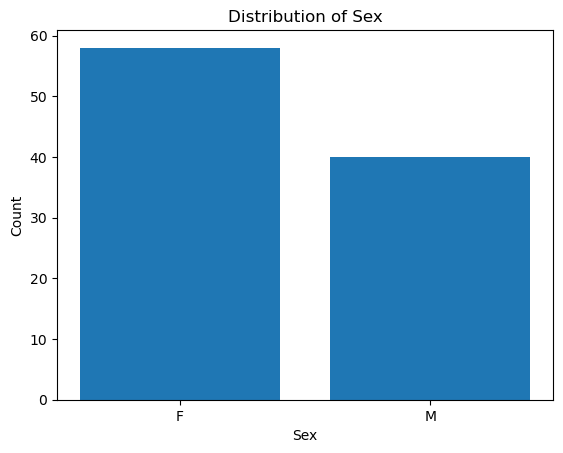

In [18]:
# Count the occurrences of each sex
sex_counts = par_data['sex'].value_counts()

# Create the bar plot
plt.bar(sex_counts.index, sex_counts.values)

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")

# Show the plot
plt.show()

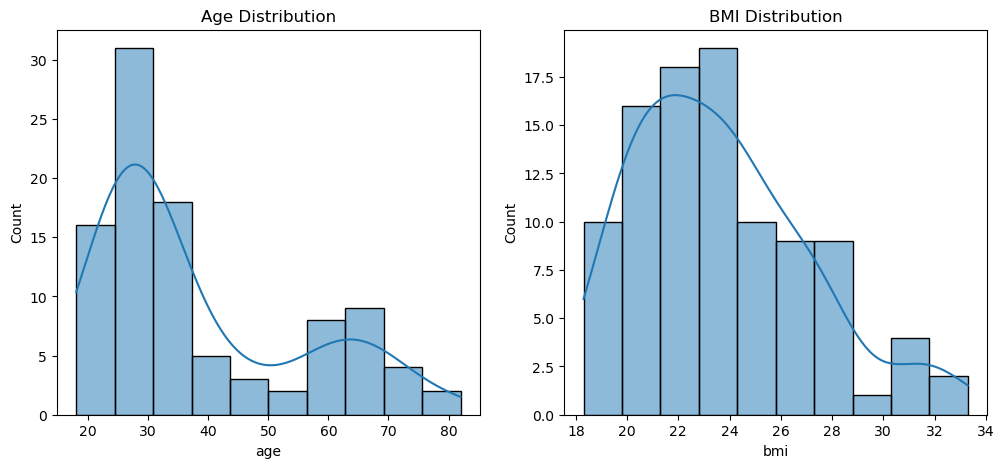

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(par_data['age'], bins=10, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(par_data['bmi'], bins=10, kde=True)
plt.title("BMI Distribution")

plt.show()

I think this is enough analysis for participant dataset , 
it confirms.
different age people are there, 
different sex people are there. 
bmi is good so people are healthy 



In [20]:
# Create DataFrame
bmi_table = pd.DataFrame({
    "BMI Range": ["< 18.5", "18.5 – 24.9", "25 – 29.9", "30+"],
    "Category": ["Underweight", "Normal Weight", "Overweight", "Obese"],
    "Health Implications": [
        "Risk of malnutrition, weak immunity",
        "Optimal health, lower disease risk",
        "Higher risk of heart disease, diabetes",
        "Increased risk of chronic illnesses"
    ]
})

# Display in Jupyter Notebook
from IPython.display import display
display(bmi_table)


,BMI Range,Category,Health Implications
0,< 18.5,Underweight,"Risk of malnutrition, weak immunity"
1,18.5 – 24.9,Normal Weight,"Optimal health, lower disease risk"
2,25 – 29.9,Overweight,"Higher risk of heart disease, diabetes"
3,30+,Obese,Increased risk of chronic illnesses


Ok, this is Enoough, let's analyse the channels tsv file

In [21]:
ch_data.head()

,REC,PSG_EEG,PSG_EOG,PSG_EMG,PSG_BELTS,PSG_THER,PSG_CAN,PSG_PPG,HB_EEG,HB_IMU,HB_PULSE
0,sub-1,1,1,1,1,1,0,0,1,0,0
1,sub-2,1,1,1,1,1,0,0,1,0,0
2,sub-3,1,1,1,0,0,0,0,1,1,1
3,sub-4,1,1,1,0,0,0,0,1,1,1
4,sub-5,1,1,1,1,1,0,0,1,0,0


In [22]:
ch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   REC        128 non-null    object
 1   PSG_EEG    128 non-null    int64 
 2   PSG_EOG    128 non-null    int64 
 3   PSG_EMG    128 non-null    int64 
 4   PSG_BELTS  128 non-null    int64 
 5   PSG_THER   128 non-null    int64 
 6   PSG_CAN    128 non-null    int64 
 7   PSG_PPG    128 non-null    int64 
 8   HB_EEG     128 non-null    int64 
 9   HB_IMU     128 non-null    int64 
 10  HB_PULSE   128 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 11.1+ KB


### The purpose of analysis of this channels.tsv file is to determine which channels needs to be included.

let's convert 0 to NaN since 0 represents missing channesl 

In [23]:
ch_data.replace(0, np.nan, inplace=True)


In [24]:
ch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   REC        128 non-null    object 
 1   PSG_EEG    128 non-null    int64  
 2   PSG_EOG    128 non-null    int64  
 3   PSG_EMG    128 non-null    int64  
 4   PSG_BELTS  62 non-null     float64
 5   PSG_THER   62 non-null     float64
 6   PSG_CAN    19 non-null     float64
 7   PSG_PPG    104 non-null    float64
 8   HB_EEG     128 non-null    int64  
 9   HB_IMU     94 non-null     float64
 10  HB_PULSE   112 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 11.1+ KB


### since We are trying to compare 2 devices, 
### the EEG signal is the consistently present in both the devices .
### So we need to keep only the PSG_EEG and HB_EEG

# The Analysis of participant.tsv and channels.tsv is hence complete